## Задача 9.3

In [1]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import csv
from scipy import integrate

Численным методом посчитаем интеграл который входит в статистику байесовского критерия для $N=10000$ выборок нормального закона с параметром $\sigma$ распределенным с априорным распределением - стандартным экспоненциальным.

In [2]:
def f_laplace(data, b):
    return np.prod(st.laplace.pdf(data / b)/ b)
def f_norm(data, teta):
    return np.prod(st.norm.pdf(data, scale = teta))

def count_K(X):
    f1 = lambda teta: st.expon.pdf(teta)*f_norm(X, teta)
    a = (integrate.quad(f1, 0, np.inf))[0]

    f2 = lambda b: st.expon.pdf(b)*f_laplace(X, b)
    b = (integrate.quad(f2, 0, np.inf))[0]
    if b !=0:
        return a / b
    else:
        return 0

emp_K = np.zeros(1000)
for i in range(1,1000):
    temp = st.expon.rvs(loc=0, scale=1, size=1)
    set1 = st.norm.rvs(loc=0, scale=temp, size = 100)

    emp_K[i] = count_K(set1)

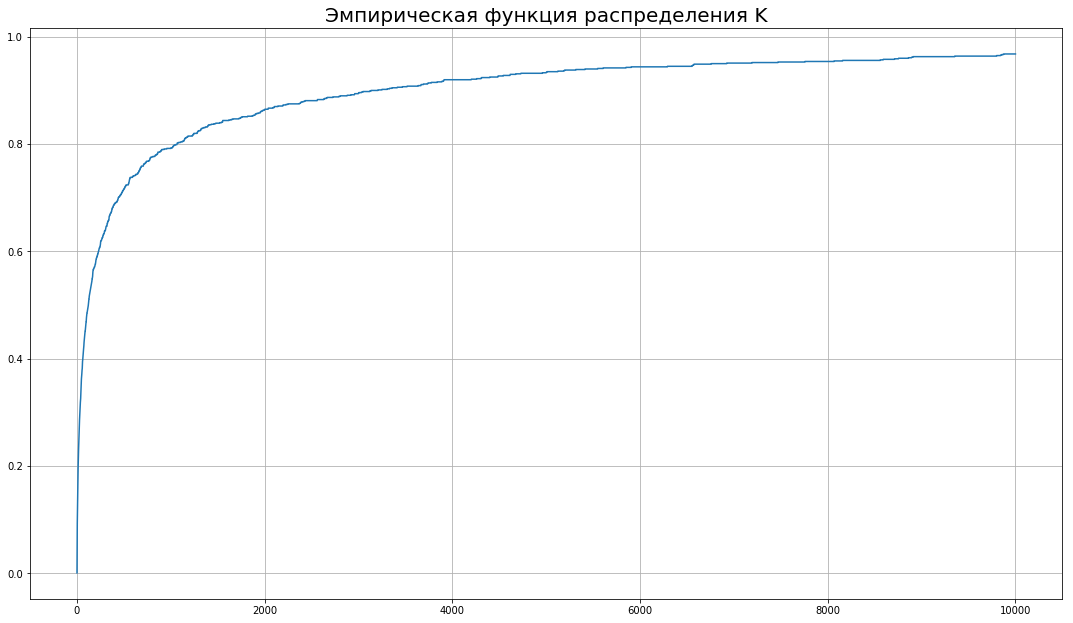

In [3]:
ecdf = sm.distributions.ECDF(emp_K)
x = np.linspace(0, 10000, 10000)
y = ecdf(x)
plt.plot(x,y)
plt.title("Эмпирическая функция распределения K", fontsize=20)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.show()

In [5]:
norm_samples = st.norm.rvs(size=100)

In [8]:
data = np.load('9-3.npy')
big_K = count_K(data)
Q = np.percentile(emp_K, 0.05)


print("Значение статитики K на случайном нормальном распределении "+ str(count_K(norm_samples)))
print("Значение статитики K на данном нам распределении "+ str(big_K))
print("Квантиль уровня значимости 0.05 распределениия K " + str(Q))

Значение статитики K на случайном нормальном распределении 7403.434870800561
Значение статитики K на данном нам распределении 14311.948632273963
Квантиль уровня значимости 0.05 распределениия K 0.00014139319881106426


Так как значение статистике на нашей выборке больше чем эмпирическое значение $K$ на уровне значимости $\alpha = 0.05$, то можно считать нашу выборку из нормального распределения.

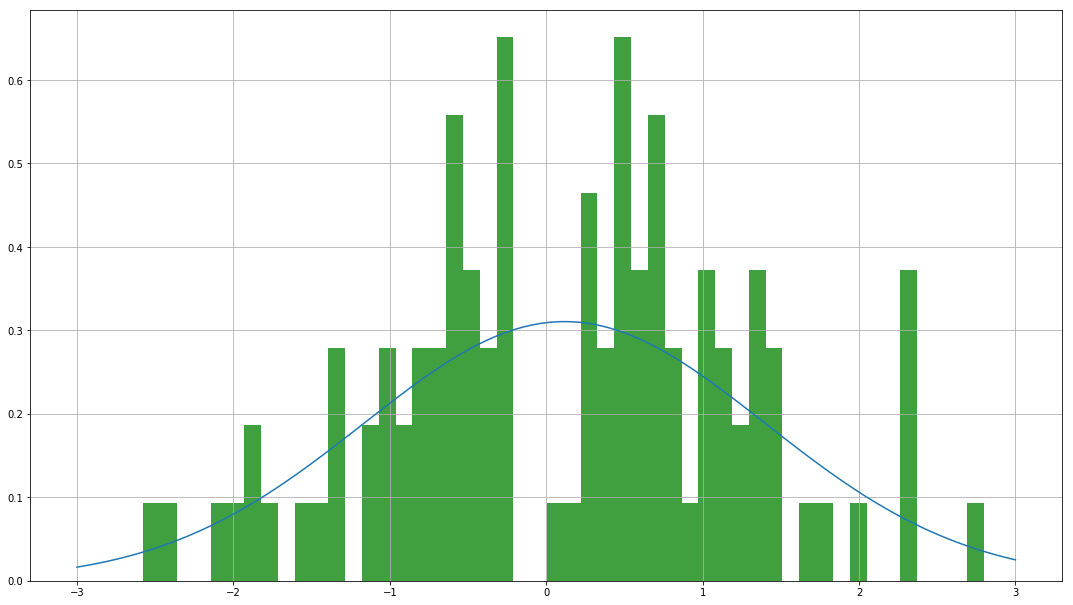

In [9]:
xx = np.linspace(-3,3, 100)
plt.plot(xx, st.norm.pdf(xx, loc=np.mean(data), scale=st.moment(data, moment=2)))
mu, sigma = 100, 15

n, bins, patches = plt.hist(data, 50, density=True, facecolor='g', alpha=0.75)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.show()

## Вывод

Данные являются нормально распределенными с уровнем доверия 0.05